In [27]:
#importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score, roc_auc_score, roc_curve,confusion_matrix

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [6]:
pd.DataFrame(data.dtypes).rename(columns={0:'dtype'})

,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
df = data.copy()
#always work on the copy dataset so that the original dataset remains intact

## EDA

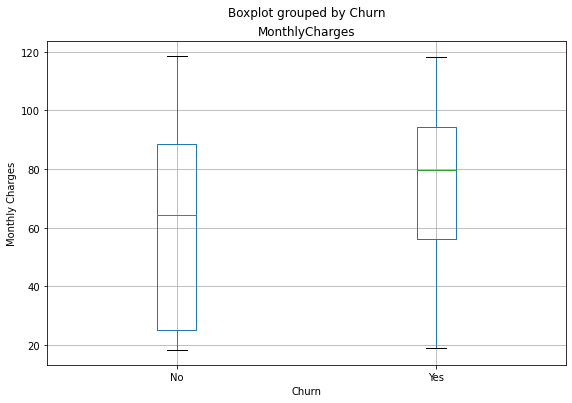

In [8]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
df.boxplot(column ='MonthlyCharges', by = 'Churn', ax=ax)
ax.set_ylabel('Monthly Charges')
ax.set_xlabel('Churn')
plt.show()

Conclusion:- This indicates that customer with high monthly charges churned out, whereas when charges are low, customer tends to not churn

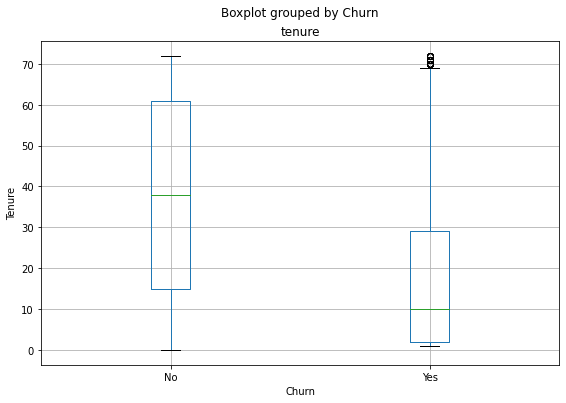

In [9]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
df.boxplot(column='tenure',by='Churn', ax=ax)
ax.set_ylabel('Tenure')
ax.set_xlabel('Churn')
plt.show()

Conclusion: Customers who are using the service for long period of time do not churn out compared to those who are new to the service.

In [11]:
df['class'] = df['Churn'].apply(lambda x:1 if x=="Yes"else 0)

X= df[['tenure','MonthlyCharges']].copy()
y=df['class'].copy()

In [13]:
df.shape

(7043, 22)

In [14]:
#Splitting Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [15]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [16]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

## Fitting Logistic Regression on Train Data.

In [17]:
clf= LogisticRegression(fit_intercept=True,max_iter=10000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [18]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [19]:
clf.intercept_

array([-1.77408975])

## Evaluating the performance of the trained model.

In [20]:
# Get the predicted Probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [21]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [22]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [24]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [25]:
#Get the Predicted Class
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)
test_class_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
#Getting the accuracy Score
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy score on Training Data is : ", train_accuracy)
print("The accuracy score on Test Data is : ", test_accuracy)

The accuracy score on Training Data is :  0.7857649982250621
The accuracy score on Test Data is :  0.7735982966643009


[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

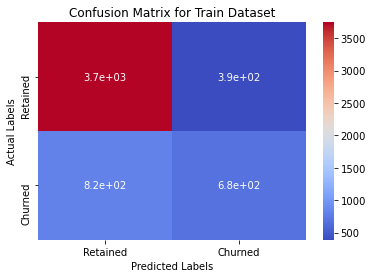

In [31]:
#Get the confusion matrics for both train and test
labels = ['Retained','Churned']
cm = confusion_matrix(y_train,train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm,annot=True,cmap='coolwarm',ax=ax)

#Labels, Titles and Ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix for Train Dataset')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

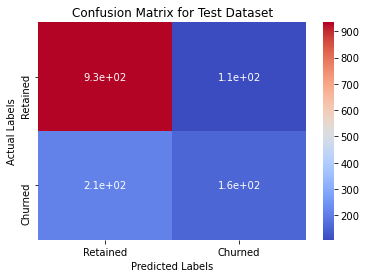

In [32]:
labels = ['Retained','Churned']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm,annot=True,cmap='coolwarm',ax=ax)

#Labels, Titles and Ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix for Test Dataset')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Implementing Cross-Validated Logistic Regression


In [33]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [34]:
logistic = LogisticRegression()

In [35]:
scoring=['accuracy']
scores = cross_validate(logistic,X_train,y_train,scoring = scoring,cv=5,return_train_score=True,return_estimator=True,verbose=10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.789) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.771) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.775) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.781, test=0.806) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [36]:
scores['train_accuracy']

array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [37]:
scores['test_accuracy']

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [38]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [39]:
for model in scores['estimator']:
    print(model.coef_)

[[-0.05617762  0.03293792]]
[[-0.05562275  0.03215852]]
[[-0.05820295  0.03454813]]
[[-0.05711808  0.03362381]]
[[-0.05530045  0.03257423]]
